# Topic Modelling

In [26]:
#importing modules
import spacy
import numpy as np
from PIL import Image
from os import path, getcwd
import pandas as pd
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
import re
import gensim
from gensim import corpora

In [2]:
#TASK 1: - Loading the dataset
#2
startup_data = pd.read_excel("Startup data.xlsx")
startup_data.head(5)

,Startup News,Summary,Posted By,Description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu..."


In [3]:
#TASK 2: - Data Cleaning and Wrangling
#1 - Combining the Startup_News, Summary and Description columns to a new column Content.
startup_data['Content'] = startup_data['Startup News'].map(str)+" "+ startup_data['Summary'].map(str)+" "+ startup_data['Description'].map(str)
#2 - Converting the Content column to a list
Content = startup_data['Content'].tolist()
# 3,4 - Clean the data by removing Unicode characters and blank spaces
def clean(x):
    return re.sub(r'[^\x00-\x7f]',r'',x)
for i in range(len(Content)):
     Content[i] = clean(Content[i])
#Data is Cleaned 
#For checking clean function
#print(clean("¡£ A unicode \xc6\x8e string \xc3\xb1 \n\n"))

In [4]:
#TASK 3: - Natural Language Processing
for i in range(len(Content)):
    j = nlp(Content[i])
    #removing stopwords , punctiation and storing lematised words in Content list
    f_story = [k.lemma_.lower() for k in j if ( k.is_stop == False) and (k.is_punct == False) and (len(k.text)>3)]
    Content[i] = nlp(" ".join(f_story))
startup_data['Content'] = Content

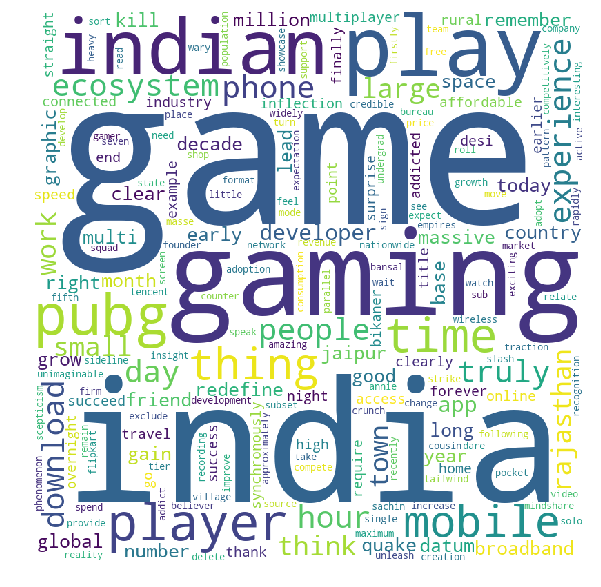

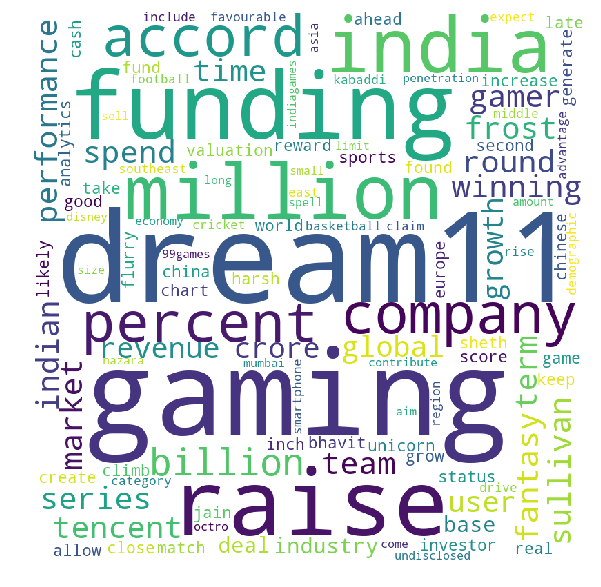

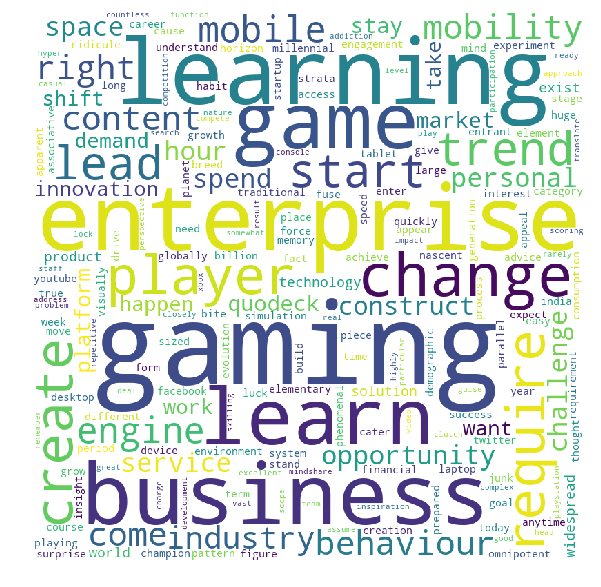

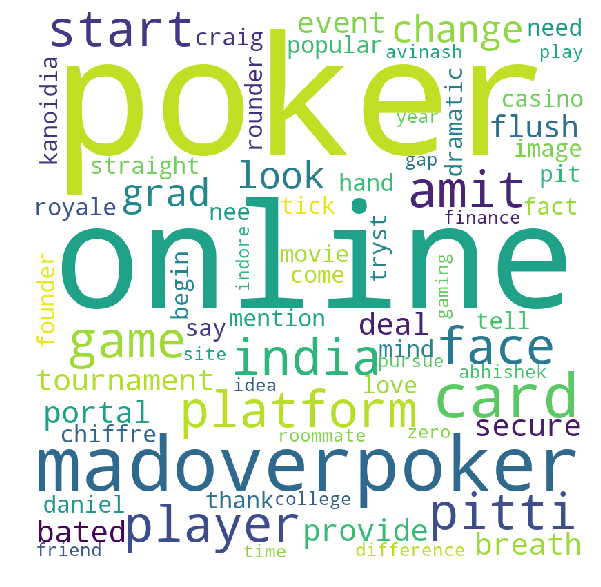

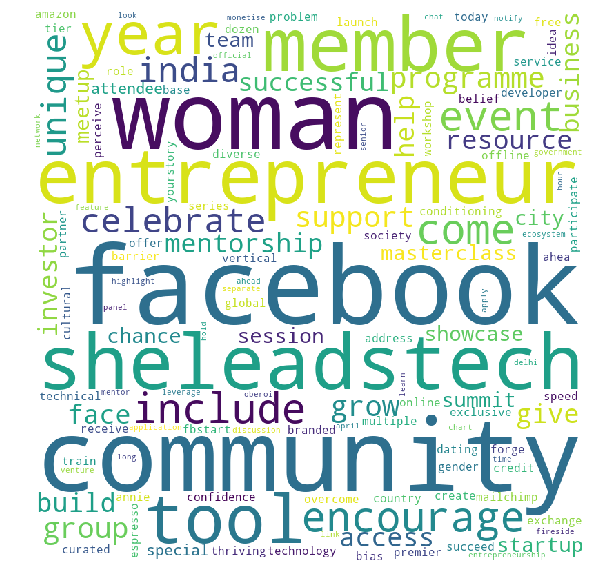

In [5]:
#Task 4 - Text Visualization
for i in range(5):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(Content[i].text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [8]:
#TASK 5: - Topic Modelling
Topics = []
for i in Content:
    corpus = [[k.text for k in i]]
    dictionary = corpora.Dictionary(corpus)
    doc_matrix = [dictionary.doc2bow(doc) for doc in corpus]
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_matrix, num_topics=10, id2word = dictionary, passes=50)
    print(ldamodel.print_topics(num_topics=10))
    
#print(Topics[0])
# startup_data['Topics'] = Topics
# startup_data.head()

[(0, '0.005*"game" + 0.005*"gaming" + 0.005*"india" + 0.005*"play" + 0.005*"player" + 0.005*"indian" + 0.005*"pubg" + 0.005*"time" + 0.005*"ecosystem" + 0.005*"mobile"'), (1, '0.005*"game" + 0.005*"india" + 0.005*"gaming" + 0.005*"play" + 0.005*"player" + 0.005*"pubg" + 0.005*"indian" + 0.005*"time" + 0.005*"thing" + 0.005*"truly"'), (2, '0.005*"game" + 0.005*"gaming" + 0.005*"india" + 0.005*"play" + 0.005*"pubg" + 0.005*"player" + 0.005*"mobile" + 0.005*"time" + 0.005*"hour" + 0.005*"truly"'), (3, '0.005*"game" + 0.005*"india" + 0.005*"gaming" + 0.005*"play" + 0.005*"indian" + 0.005*"pubg" + 0.005*"player" + 0.005*"time" + 0.005*"truly" + 0.005*"thing"'), (4, '0.005*"game" + 0.005*"gaming" + 0.005*"india" + 0.005*"play" + 0.005*"player" + 0.005*"pubg" + 0.005*"indian" + 0.005*"day" + 0.005*"time" + 0.005*"phone"'), (5, '0.005*"game" + 0.005*"play" + 0.005*"india" + 0.005*"gaming" + 0.005*"pubg" + 0.005*"indian" + 0.005*"mobile" + 0.005*"player" + 0.005*"thing" + 0.005*"download"'), (6

[(0, '0.007*"woman" + 0.007*"community" + 0.007*"facebook" + 0.007*"entrepreneur" + 0.007*"sheleadstech" + 0.007*"member" + 0.007*"encourage" + 0.007*"tool" + 0.007*"event" + 0.007*"year"'), (1, '0.007*"facebook" + 0.007*"woman" + 0.007*"community" + 0.007*"entrepreneur" + 0.007*"sheleadstech" + 0.007*"member" + 0.007*"event" + 0.007*"year" + 0.007*"encourage" + 0.007*"come"'), (2, '0.007*"facebook" + 0.007*"community" + 0.007*"woman" + 0.007*"member" + 0.007*"sheleadstech" + 0.007*"entrepreneur" + 0.007*"include" + 0.007*"tool" + 0.007*"event" + 0.007*"come"'), (3, '0.007*"community" + 0.007*"facebook" + 0.007*"entrepreneur" + 0.007*"woman" + 0.007*"member" + 0.007*"sheleadstech" + 0.007*"tool" + 0.007*"encourage" + 0.007*"special" + 0.007*"include"'), (4, '0.007*"facebook" + 0.007*"community" + 0.007*"woman" + 0.007*"sheleadstech" + 0.007*"entrepreneur" + 0.007*"tool" + 0.007*"member" + 0.007*"come" + 0.007*"year" + 0.007*"special"'), (5, '0.007*"woman" + 0.007*"facebook" + 0.007*"co

[(0, '0.011*"safely" + 0.011*"seal" + 0.011*"reach" + 0.011*"recognise" + 0.011*"rhetoric" + 0.011*"prompt" + 0.011*"size" + 0.011*"significant" + 0.011*"point" + 0.011*"sector"'), (1, '0.032*"woman" + 0.025*"india" + 0.025*"zomato" + 0.017*"impact" + 0.017*"launch" + 0.017*"package" + 0.017*"indian" + 0.017*"delivery" + 0.017*"miss" + 0.017*"story"'), (2, '0.011*"woman" + 0.011*"zomato" + 0.011*"india" + 0.011*"launch" + 0.011*"delivery" + 0.011*"package" + 0.011*"story" + 0.011*"company" + 0.011*"participation" + 0.011*"number"'), (3, '0.011*"woman" + 0.011*"india" + 0.011*"zomato" + 0.011*"launch" + 0.011*"indian" + 0.011*"participation" + 0.011*"miss" + 0.011*"startup" + 0.011*"package" + 0.011*"delivery"'), (4, '0.011*"safely" + 0.011*"seal" + 0.011*"reach" + 0.011*"recognise" + 0.011*"rhetoric" + 0.011*"prompt" + 0.011*"size" + 0.011*"significant" + 0.011*"point" + 0.011*"sector"'), (5, '0.011*"woman" + 0.011*"india" + 0.011*"zomato" + 0.011*"economic" + 0.011*"miss" + 0.011*"con

[(0, '0.006*"sonu" + 0.006*"festival" + 0.006*"science" + 0.006*"say" + 0.006*"world" + 0.006*"indian" + 0.006*"work" + 0.006*"artsci" + 0.006*"feature" + 0.006*"discover"'), (1, '0.035*"festival" + 0.031*"sonu" + 0.019*"say" + 0.016*"science" + 0.016*"world" + 0.012*"artsci" + 0.012*"discover" + 0.012*"creative" + 0.012*"feature" + 0.012*"curator"'), (2, '0.006*"festival" + 0.006*"sonu" + 0.006*"say" + 0.006*"indian" + 0.006*"artsci" + 0.006*"world" + 0.006*"discover" + 0.006*"feature" + 0.006*"creative" + 0.006*"curator"'), (3, '0.006*"festival" + 0.006*"sonu" + 0.006*"say" + 0.006*"world" + 0.006*"work" + 0.006*"discover" + 0.006*"creative" + 0.006*"indian" + 0.006*"india" + 0.006*"artsci"'), (4, '0.006*"sonu" + 0.006*"festival" + 0.006*"say" + 0.006*"feature" + 0.006*"science" + 0.006*"creative" + 0.006*"work" + 0.006*"artsci" + 0.006*"curator" + 0.006*"world"'), (5, '0.006*"festival" + 0.006*"sonu" + 0.006*"world" + 0.006*"say" + 0.006*"science" + 0.006*"curator" + 0.006*"feature"

[(0, '0.012*"peter" + 0.012*"percent" + 0.012*"relevant" + 0.012*"read" + 0.012*"quote" + 0.012*"product" + 0.012*"premature" + 0.012*"power" + 0.012*"poor" + 0.012*"retention"'), (1, '0.013*"growth" + 0.013*"product" + 0.013*"say" + 0.013*"mona" + 0.013*"distribution" + 0.013*"focus" + 0.013*"company" + 0.013*"market" + 0.013*"fail" + 0.013*"work"'), (2, '0.054*"growth" + 0.054*"product" + 0.041*"mona" + 0.027*"company" + 0.027*"market" + 0.027*"distribution" + 0.027*"say" + 0.021*"retention" + 0.021*"focus" + 0.021*"work"'), (3, '0.012*"peter" + 0.012*"percent" + 0.012*"relevant" + 0.012*"read" + 0.012*"quote" + 0.012*"product" + 0.012*"premature" + 0.012*"power" + 0.012*"poor" + 0.012*"retention"'), (4, '0.013*"growth" + 0.013*"product" + 0.013*"mona" + 0.013*"distribution" + 0.013*"market" + 0.013*"gandhi" + 0.013*"company" + 0.013*"work" + 0.013*"say" + 0.013*"fail"'), (5, '0.012*"peter" + 0.012*"percent" + 0.012*"relevant" + 0.012*"read" + 0.012*"quote" + 0.012*"product" + 0.012*

In [7]:
#TASK 6: - Categorizing each news article
Category =[]
for i in range(len(Topics)):
    if 'game' in Topics[i] or 'gaming' in Topics[i]:
        Category.append("Game")
    elif 'startup' in Topics[i] or 'entrepreneur' in Topics[i]:
        Category.append("Startup")
    elif 'fund' in Topics[i] or 'funding' in Topics[i]:
        Category.append("Fund")
    elif 'science' in Topics[i]:
        Category.append('Science')
    elif 'woman' in Topics[i]:
        Category.append('woman')
    else:
        Category.append('NA')
startup_data['Category'] = Category

startup_data

,Startup News,Summary,Posted By,Description,Content,Category
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ...","(pubg, redefine, indian, gaming, ecosystem, fo...",NA
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...,"(dream11, close, funding, tencent, inch, unico...",NA
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...,"(enterprise, gaming, grow, ridicule, opportuni...",NA
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand...","(grad, change, india, look, poker, madoverpoke...",NA
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu...","(facebook, celebrate, year, encourage, woman, ...",NA
5,Confidence: women's last hurdle to making it t...,Women working at their full potential could ad...,Apurva Purohit,Women possess most of the characteristics of a...,"(confidence, woman, hurdle, make, boardroom, w...",NA
6,From the beauty of handlooms to Captain Marvel...,NaN,Team YS,"Seema Agarwal, Co-founder of Artisan Saga, tal...","(beauty, handloom, captain, marvel, reshape, w...",NA
7,"Hansi Mehrotra, Founder of The Money Hans, on ...",NaN,Shruthi Mohan,"“My father, who was on his deathbed, told me t...","(hansi, mehrotra, founder, money, hans, woman,...",NA
8,India's missing demographic dividend: an analy...,NaN,Team YS,"All through this month, in the wake of Interna...","(india, miss, demographic, dividend, analysis,...",NA
9,These 5 STEM-based activity startups are on a ...,Meet the five startups that are using digital ...,Libza Mannan,"The demand for Science, Technology, Engineerin...","(stem, base, activity, startup, mission, futur...",NA


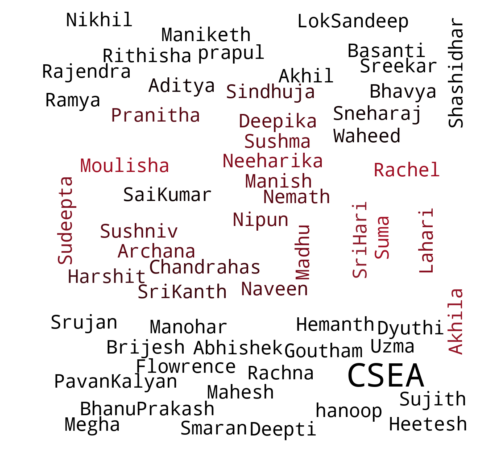

In [28]:
d = getcwd()
x="CSEA CSEA CSEA CSEA CSEA CSEA Abhishek Rithisha Aditya Akhil Akhila Archana Basanti BhanuPrakash, Bhavya, Brijesh,Chandrahas Deepika, Deepti, Dyuthi Flowrence, Goutham hanoop Harshit , Heetesh , Hemanth, Lahari, LokSandeep, Madhu Mahesh Maniketh Manish Manohar Megha Moulisha Naveen Nikhil Nipun PavanKalyan Pranitha prapul Rachel Rachna Rajendra Ramya, SaiKumar Shashidhar Sindhuja Neeharika Smaran Sneharaj Sreekar SriHari SriKanth Srujan Sudeepta, Sujith Suma Sushma Sushniv Nemath, Uzma Waheed"
mask = np.array(Image.open(path.join(d, "CSE.png")))
wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size =10,  max_font_size =90 ,max_words=100,mask=mask).generate(x) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear") 
plt.axis("off") 
plt.show()